# GEOVOL modelling in Python

During geopolitical events volatilities of financial assets have correlated innovation usually which causes extra risk.
The statistical model here tries to catch the common volatility shock. That is, the shock tells us on each day how important is the geopolitical risk. 

There is an R package on CRAN at https://cran.r-project.org/web/packages/geovol/geovol.pdf by Robert F. Engle, Susana Campos-Martins, however, there is no Python implementation of the code.

With the Jupyter notebook I would like to fill in that gap, since Python is the first choice in quantitative finance in practice.

---------

There will be a few difference between the two implementations. The original one uses a special PCA where the principal components are estimated using the correlation and not the covariance matrix. Since Python is lack of such implementation of PCA, we use the regular PCA. We also ommit the desire to have only positive elements in the first principal component.

In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
eSim = pd.read_csv('simulated_e.csv').drop('Unnamed: 0', axis = 1)

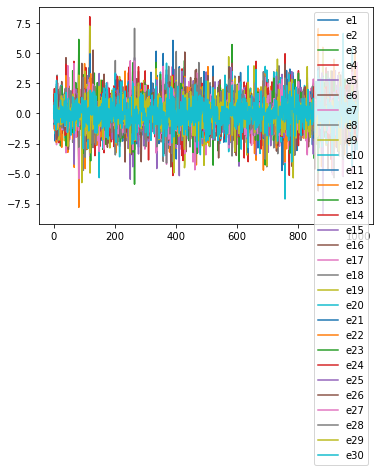

In [10]:
eSim.plot()
plt.show()

In [12]:
eSim**2

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,...,e21,e22,e23,e24,e25,e26,e27,e28,e29,e30
0,0.000119,0.012498,0.092981,0.179577,1.234704,0.047668,0.010622,0.045499,0.001347,0.001409,...,0.014293,0.145687,0.008085,0.019727,0.452508,0.000113,0.071498,0.166096,0.171288,0.180377
1,0.162780,0.665876,0.100088,0.040097,0.032423,0.000189,0.035278,0.208669,0.029750,0.027096,...,0.801542,0.047723,0.247427,0.545975,0.293141,0.012091,0.555316,0.856390,0.038255,0.464534
2,1.341853,0.248276,2.624635,0.000005,0.250995,0.538048,0.005125,0.303700,0.016828,1.139215,...,0.065693,0.004883,0.404953,4.231080,0.665391,0.684473,0.465291,0.623843,0.187936,0.026259
3,0.020079,0.000072,0.519170,0.098037,0.019805,0.522406,0.204156,0.009474,0.171308,0.654767,...,0.672913,1.984399,0.060149,0.062282,0.055212,0.048312,0.393894,0.187880,0.529347,0.822331
4,0.220802,0.057042,0.081584,1.259289,0.076533,0.682781,0.412329,0.577157,0.537574,0.179432,...,0.305914,0.459337,0.011547,0.188456,0.060247,0.598630,0.534953,0.110649,0.094151,2.739022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.018063,0.000064,0.036040,0.065352,0.879280,0.050963,0.025599,3.576120,3.128622,0.650282,...,0.150742,1.825949,0.180749,3.534847,0.501746,0.432429,0.032969,0.281481,0.378841,0.082246
996,2.446443,0.201884,1.188737,5.043489,11.355373,0.030679,17.818406,0.027848,0.389872,9.107065,...,3.833986,0.562157,0.402356,2.681915,2.261925,8.001808,0.744304,4.472635,2.560694,2.975515
997,0.415081,0.650133,0.556795,0.307585,1.936639,0.773100,1.978518,1.444623,0.004143,0.714817,...,0.000215,0.032608,0.000089,0.217152,0.160500,0.398914,1.204993,0.445774,0.518154,1.279274
998,0.084698,0.126581,0.144172,0.009170,0.022242,0.011542,0.009476,0.038007,0.000068,0.333389,...,0.009876,0.017173,0.274012,0.008072,0.056108,0.001022,0.001012,0.044088,0.006780,0.036405


In [18]:
pca = PCA(n_components=1)
pca.fit(eSim**2)

PCA(n_components=1)

In [19]:
pca.components_

array([[0.18216452, 0.19130112, 0.19668105, 0.22186846, 0.14708347,
        0.17061066, 0.15960286, 0.17980643, 0.20120413, 0.14491585,
        0.14371808, 0.22515118, 0.17842708, 0.18759179, 0.15935716,
        0.18360222, 0.21345558, 0.17729745, 0.17349408, 0.16623963,
        0.17908201, 0.20952329, 0.19738529, 0.12747533, 0.24885602,
        0.15322983, 0.18845806, 0.17751164, 0.15764922, 0.17776206]])

In [33]:
asd = np.array([[1,2,3,4], [5,3,6,7], [1,1,1,1], [0,-9,7,3]])
asdf = PCA(n_components=4)
asdf.fit(asd.T)

PCA(n_components=4)

In [34]:
asdf.transform(asd)

array([[-2.7909871 , -3.5176333 ,  2.59068465, -2.        ],
       [-6.2941441 , -0.15726168,  4.15138757, -5.        ],
       [ 0.34207266, -3.421421  ,  3.00863168,  0.        ],
       [ 0.68438203, -9.33020976, 11.37338152, -6.        ]])

In [35]:
w, v = np.linalg.eig(np.matmul(asd, asd.T))

In [36]:
np.sum(np.square(v[:, 0]))

1.0

In [37]:
asdf.components_

array([[-0.09252431, -0.21923359, -0.        , -0.97127539],
       [ 0.86414598,  0.46692199, -0.        , -0.18771143],
       [ 0.49466249, -0.8566916 , -0.        ,  0.14624819],
       [ 0.        ,  0.        , -1.        ,  0.        ]])